In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the datasets**

In [30]:
!pip install kagglehub --quiet

import kagglehub

# Download latest version
path = kagglehub.dataset_download("zyan1999/student-performance-dataset")

print("Path to dataset files:", path)

100%|██████████| 109k/109k [00:00<00:00, 40.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zyan1999/student-performance-dataset/versions/1


In [31]:
import os

# List files inside the dataset folder
os.listdir(path)


['student_performance_dataset.csv']

In [32]:
import pandas as pd

# Replace the filename with the actual one from os.listdir(path)
df = pd.read_csv(os.path.join(path,'student_performance_dataset.csv'))

df.head()

,student_id,age,gender,program,prior_gpa,total_logins,avg_session_duration,time_spent_on_materials,num_forum_posts,num_forum_replies,...,quiz_attempts,quiz_scores_avg,assignment_scores_avg,final_exam_score,text_feature_1,text_feature_2,text_feature_3,text_feature_4,text_feature_5,student_performance
0,S0001,24,Male,Diploma,2.25,129,44.43,32.47,21,10,...,3,93.55,67.14,56.16,0.808,0.204,0.594,0.216,0.734,Fail
1,S0002,37,Female,BSc,2.12,106,26.31,9.99,16,8,...,3,83.12,91.33,52.73,0.421,0.823,0.949,0.555,0.901,Fail
2,S0003,32,Male,Diploma,2.61,125,40.68,35.72,13,8,...,2,50.27,86.04,31.85,0.034,0.463,0.503,0.416,0.315,Pass
3,S0004,28,Other,BSc,2.32,132,12.61,49.29,15,5,...,3,52.41,76.74,94.96,0.723,0.553,0.082,0.951,0.888,Pass
4,S0005,25,Female,Diploma,2.35,118,14.96,45.75,17,13,...,6,88.86,42.76,91.00,0.353,0.246,0.628,0.043,0.496,Pass


**Split Into Two Related Tables**

In [50]:
# Import pandas
import pandas as pd

# Example: assuming you already loaded both tables
# table1 = pd.read_csv('/content/table1.csv')
# table2 = pd.read_csv('/content/table2.csv')

# Display the first few rows of each to confirm
print("Table 1:")
print(table1.head())

print("\nTable 2:")
print(table2.head())


Table 1:
   student_id  age gender program  prior_gpa
0         101   20      F      AI        3.4
1         102   21      M      CS        3.1
2         103   19      F      DS        3.8
3         104   22      M      IT        3.2
4         105   20      F      AI        3.6

Table 2:
   student_id  total_logins  avg_session_duration  quiz_scores_avg  \
0         101           120                    35               88   
1         102            80                    25               76   
2         103            95                    30               92   
3         104            70                    20               70   
4         105           110                    40               85   

   final_exam_score student_performance  
0                90                High  
1                78              Medium  
2                95                High  
3                73                 Low  
4                88                High  


In [51]:
# Perform merge operation on common key (e.g., 'student_id')
merged_df = pd.merge(table1, table2, on='student_id', how='inner')

# Display the merged dataset
print("\nMerged Dataset:")
print(merged_df.head())

# Check final shape
print(f"\nMerged dataset shape: {merged_df.shape}")


Merged Dataset:
   student_id  age gender program  prior_gpa  total_logins  \
0         101   20      F      AI        3.4           120   
1         102   21      M      CS        3.1            80   
2         103   19      F      DS        3.8            95   
3         104   22      M      IT        3.2            70   
4         105   20      F      AI        3.6           110   

   avg_session_duration  quiz_scores_avg  final_exam_score student_performance  
0                    35               88                90                High  
1                    25               76                78              Medium  
2                    30               92                95                High  
3                    20               70                73                 Low  
4                    40               85                88                High  

Merged dataset shape: (5, 10)


In [39]:
#  Perform merge operation on common key (e.g., 'student_id')
merged_df = pd.merge(table1, table2, on='student_id', how='inner')

# Display the merged dataset
print("\nMerged Dataset:")
print(merged_df.head())

# Check final shape
print(f"\nMerged dataset shape: {merged_df.shape}")


Merged Dataset:
  student_id  age  gender  program  prior_gpa  total_logins  \
0      S0001   24    Male  Diploma       2.25           129   
1      S0002   37  Female      BSc       2.12           106   
2      S0003   32    Male  Diploma       2.61           125   
3      S0004   28   Other      BSc       2.32           132   
4      S0005   25  Female  Diploma       2.35           118   

   avg_session_duration  time_spent_on_materials  num_forum_posts  \
0                 44.43                    32.47               21   
1                 26.31                     9.99               16   
2                 40.68                    35.72               13   
3                 12.61                    49.29               15   
4                 14.96                    45.75               17   

   num_forum_replies  quiz_attempts  quiz_scores_avg  assignment_scores_avg  \
0                 10              3            93.55                  67.14   
1                  8           

**Preprocessing the data**

In [58]:
#Handling the missing values
print("Missing values before handling:")
print(merged_df.isnull().sum())

merged_df.drop_duplicates(inplace=True)

merged_df.fillna(merged_df.mean(numeric_only=True), inplace=True)

# For columns, fill the mode
for col in merged_df.select_dtypes(include=['object']).columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])

print("\nMissing values after handling:")
print(merged_df.isnull().sum())

Missing values before handling:
student_id              0
age                     0
gender                  0
program                 0
prior_gpa               0
total_logins            0
avg_session_duration    0
quiz_scores_avg         0
final_exam_score        0
student_performance     0
dtype: int64

Missing values after handling:
student_id              0
age                     0
gender                  0
program                 0
prior_gpa               0
total_logins            0
avg_session_duration    0
quiz_scores_avg         0
final_exam_score        0
student_performance     0
dtype: int64


In [59]:
# Fix the correct data type
# Check current data types
print("Data types before correction:\n", merged_df.dtypes)

# Convert 'student_id' to string (since it's an identifier, not numeric)
merged_df['student_id'] = merged_df['student_id'].astype(str)

# Convert categorical/text columns to 'category' dtype
categorical_cols = ['gender', 'program', 'student_performance']
for col in categorical_cols:
    merged_df[col] = merged_df[col].astype('category')

# Ensure numeric columns are in proper numeric format
numeric_cols = ['age', 'prior_gpa', 'total_logins', 'avg_session_duration',
                'quiz_scores_avg', 'final_exam_score']

for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Check again after conversion
print("\nData types after correction:\n", merged_df.dtypes)


Data types before correction:
 student_id                int64
age                       int64
gender                   object
program                  object
prior_gpa               float64
total_logins              int64
avg_session_duration      int64
quiz_scores_avg           int64
final_exam_score          int64
student_performance      object
dtype: object

Data types after correction:
 student_id                object
age                        int64
gender                  category
program                 category
prior_gpa                float64
total_logins               int64
avg_session_duration       int64
quiz_scores_avg            int64
final_exam_score           int64
student_performance     category
dtype: object


In [61]:
#LabelEncoder converts categories to integer labels, e.g., Male → 1, Female → 0
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode each categorical column
for col in ['gender', 'program', 'student_performance']:
    merged_df[col] = label_encoder.fit_transform(merged_df[col])

# Check first few rows
print(merged_df.head())

  student_id  age  gender  program  prior_gpa  total_logins  \
0        101   20       0        0        3.4           120   
1        102   21       1        1        3.1            80   
2        103   19       0        2        3.8            95   
3        104   22       1        3        3.2            70   
4        105   20       0        0        3.6           110   

   avg_session_duration  quiz_scores_avg  final_exam_score  \
0                    35               88                90   
1                    25               76                78   
2                    30               92                95   
3                    20               70                73   
4                    40               85                88   

   student_performance  
0                    0  
1                    2  
2                    0  
3                    1  
4                    0  


In [63]:
#Normalization (or scaling) adjusts numeric features so that they are on a similar scale and improves performance.
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_cols = ['age', 'prior_gpa', 'total_logins', 'avg_session_duration',
                'quiz_scores_avg', 'final_exam_score']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform numeric columns
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

# Check the first few rows after scaling
print(merged_df.head())

  student_id       age  gender  program  prior_gpa  total_logins  \
0        101 -0.392232       0        0  -0.078087      1.355815   
1        102  0.588348       1        1  -1.249390     -0.813489   
2        103 -1.372813       0        2   1.483651      0.000000   
3        104  1.568929       1        3  -0.858956     -1.355815   
4        105 -0.392232       0        0   0.702782      0.813489   

   avg_session_duration  quiz_scores_avg  final_exam_score  \
0              0.707107         0.719623          0.643202   
1             -0.707107        -0.769252         -0.841110   
2              0.000000         1.215915          1.261665   
3             -1.414214        -1.513690         -1.459574   
4              1.414214         0.347404          0.395817   

   student_performance  
0                    0  
1                    2  
2                    0  
3                    1  
4                    0  


 **Descriptive analysis**

In [68]:
import numpy as np
# Select only numeric columns
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Summary statistics: mean, median, std
summary_stats = merged_df[numeric_cols].describe().T[['mean', 'std']]
summary_stats['median'] = merged_df[numeric_cols].median()
print(" Summary Statistics (mean, median, std) for numeric columns:\n")
display(summary_stats)

# Correlation matrix for numeric columns
print("\n Correlation Matrix:")
correlation_matrix = merged_df[numeric_cols].corr()
display(correlation_matrix)


 Summary Statistics (mean, median, std) for numeric columns:



,mean,std,median
age,4.440892e-17,1.118034,-0.392232
gender,4.000000e-01,0.547723,0.000000
program,1.200000e+00,1.303840,1.000000
prior_gpa,0.000000e+00,1.118034,-0.078087
total_logins,0.000000e+00,1.118034,0.000000
avg_session_duration,0.000000e+00,1.118034,0.000000
quiz_scores_avg,-3.330669e-17,1.118034,0.347404
final_exam_score,3.330669e-17,1.118034,0.395817
student_performance,6.000000e-01,0.894427,0.000000



 Correlation Matrix:


,age,gender,program,prior_gpa,total_logins,avg_session_duration,quiz_scores_avg,final_exam_score,student_performance
age,1.000000,0.880705,0.437237,-0.872904,-0.691333,-0.693375,-0.983041,-0.984880,0.686406
gender,0.880705,1.000000,0.560112,-0.860729,-0.885615,-0.866025,-0.932007,-0.939250,0.918559
program,0.437237,0.560112,1.000000,-0.147310,-0.837073,-0.848875,-0.493657,-0.462446,0.300123
prior_gpa,-0.872904,-0.860729,-0.147310,1.000000,0.529357,0.607373,0.850647,0.880880,-0.839434
total_logins,-0.691333,-0.885615,-0.837073,0.529357,1.000000,0.920358,0.787269,0.771440,-0.745698
avg_session_duration,-0.693375,-0.866025,-0.848875,0.607373,0.920358,1.000000,0.736956,0.734697,-0.707107
quiz_scores_avg,-0.983041,-0.932007,-0.493657,0.850647,0.787269,0.736956,1.000000,0.998163,-0.763048
final_exam_score,-0.984880,-0.939250,-0.462446,0.880880,0.771440,0.734697,0.998163,1.000000,-0.785448
student_performance,0.686406,0.918559,0.300123,-0.839434,-0.745698,-0.707107,-0.763048,-0.785448,1.000000


In [72]:
# Identify outliners using IQR (Interquartile Range) method
#Select numeric columns only
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Create a dictionary to store number of outliers per column
outlier_summary = {}

# Loop through each numeric column
for col in numeric_cols:
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers ( datapoints that differs significantly from other observations in your dataset.)
    outliers = merged_df[(merged_df[col] < Q1 - 1.5*IQR) | (merged_df[col] > Q3 + 1.5*IQR)]

    # Store the count
    outlier_summary[col] = len(outliers)

# Display number of outliers per column
import pandas as pd
outlier_counts = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
print("Number of Outliers per Numeric Column:")
display(outlier_counts)

# Check distribution of categorical variables
categorical_cols = ['gender', 'program', 'student_performance']

print("\n Categorical Data Distribution:")
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(merged_df[col].value_counts())


Number of Outliers per Numeric Column:


,Outlier_Count
age,0
gender,0
program,0
prior_gpa,0
total_logins,0
avg_session_duration,0
quiz_scores_avg,0
final_exam_score,0
student_performance,0



 Categorical Data Distribution:

gender value counts:
gender
0    3
1    2
Name: count, dtype: int64

program value counts:
program
0    2
1    1
2    1
3    1
Name: count, dtype: int64

student_performance value counts:
student_performance
0    3
2    1
1    1
Name: count, dtype: int64


**Exploratory Data Analysis (EDA)**

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="muted")

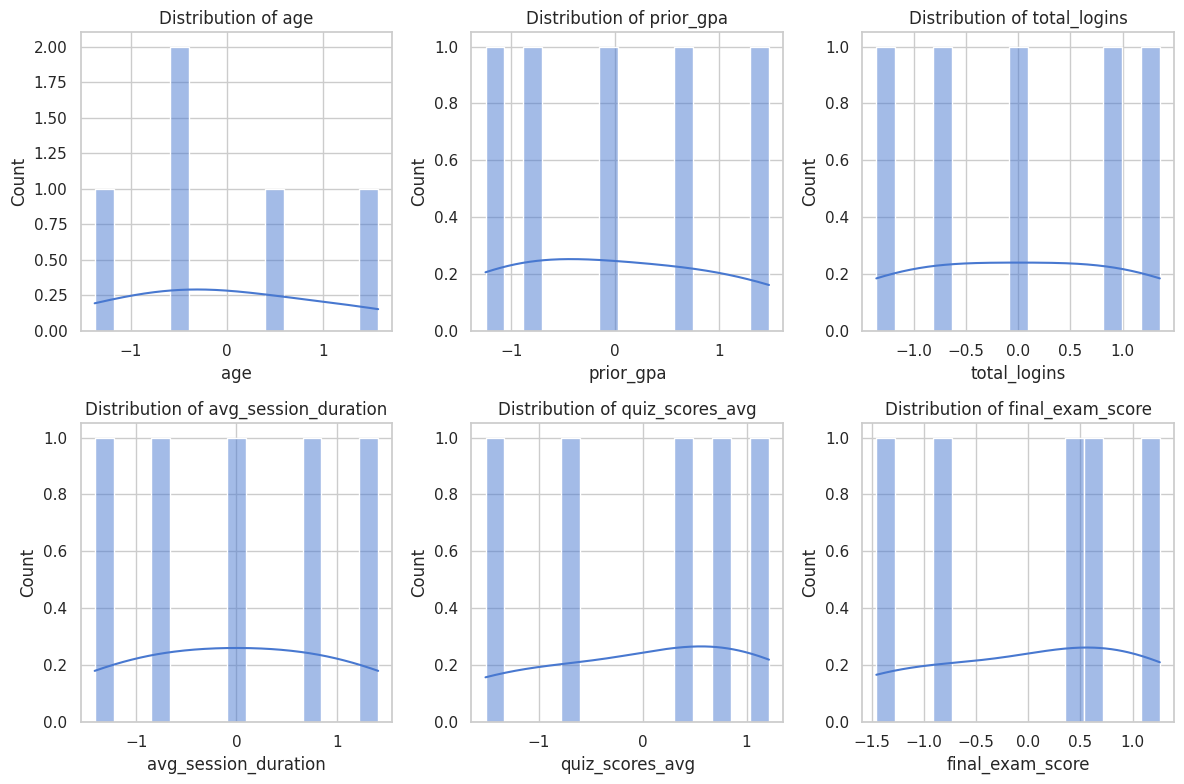

In [75]:
#Value Distributions : Histogram
numeric_cols = ['age', 'prior_gpa', 'total_logins', 'avg_session_duration', 'quiz_scores_avg', 'final_exam_score']

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(merged_df[col], bins=15, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

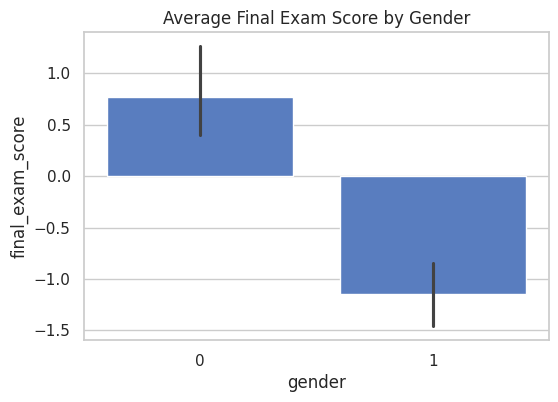

In [76]:
# Relationship Plots : Barplot
plt.figure(figsize=(6,4))
sns.barplot(data=merged_df, x='gender', y='final_exam_score')
plt.title('Average Final Exam Score by Gender')
plt.show()

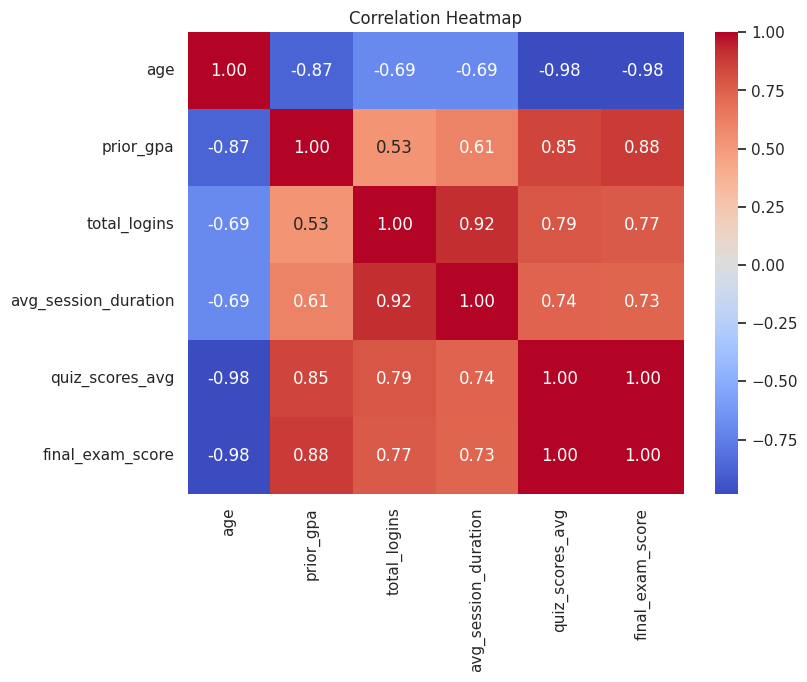

In [77]:
# Correlation heatmap
plt.figure(figsize=(8,6))
corr = merged_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

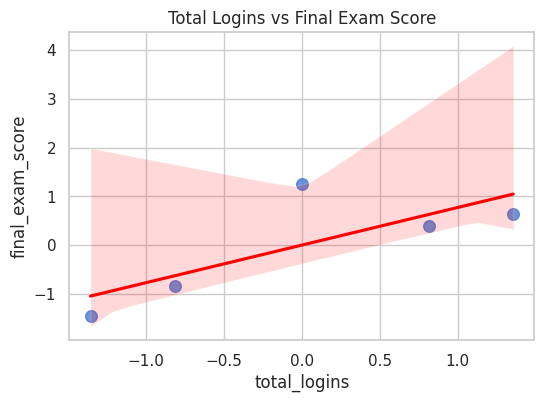

In [78]:
#Pattern Relationship
plt.figure(figsize=(6,4))
sns.regplot(data=merged_df, x='total_logins', y='final_exam_score', scatter_kws={'s':70}, line_kws={'color':'red'})
plt.title('Total Logins vs Final Exam Score')
plt.show()
